In [23]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

def read_gff(gff_annotation_file_name):
    gff_annotation = pd.read_csv(gff_annotation_file_name, sep='\t', skiprows=1, header=None, names=['seq_id', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes'])
    return gff_annotation
read_gff('rrna_annotation.gff')

,seq_id,source,type,start,end,score,strand,phase,attributes
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.000000e+00,+,.,Name=16S_rRNA;product=16S ribosomal RNA
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.000000e+00,+,.,Name=23S_rRNA;product=23S ribosomal RNA
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.000000e+00,+,.,Name=16S_rRNA;product=16S ribosomal RNA
3,Reference_10,barrnap:0.9,rRNA,471166,474246,0.000000e+00,+,.,Name=23S_rRNA;product=23S ribosomal RNA
4,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.000000e+00,-,.,Name=23S_rRNA;product=23S ribosomal RNA
...,...,...,...,...,...,...,...,...,...
343,Reference_25,barrnap:0.9,rRNA,1819878,1822785,0.000000e+00,+,.,Name=23S_rRNA;product=23S ribosomal RNA
344,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,Name=5S_rRNA;product=5S ribosomal RNA
345,Reference_25,barrnap:0.9,rRNA,3744056,3744159,2.900000e-10,-,.,Name=5S_rRNA;product=5S ribosomal RNA
346,Reference_25,barrnap:0.9,rRNA,3744287,3747194,0.000000e+00,-,.,Name=23S_rRNA;product=23S ribosomal RNA


In [2]:
def read_bed6(name_of_bed_file):
    bed_file = pd.read_csv(name_of_bed_file, sep='\t', header=None, names=['chrom','chromStart','chromEnd','name','score','strand'])
    return bed_file
read_bed6('alignment.bed')


,chrom,chromStart,chromEnd,name,score,strand
0,Reference_1,197681,200286,NODE_1445_length_2603_cov_1135.593799,41,-
1,Reference_1,202886,202996,NODE_19543_length_110_cov_1549.290909,0,-
2,Reference_1,202941,203377,NODE_5666_length_436_cov_418.653543,16,+
3,Reference_1,203322,785222,NODE_25_length_581906_cov_146.024228,60,+
4,Reference_1,785169,1763981,NODE_11_length_978812_cov_132.517515,60,-
...,...,...,...,...,...,...
7705,Reference_26,5532432,5535601,NODE_1329_length_3169_cov_103.935132,5,+
7706,Reference_26,5535546,5535722,NODE_19238_length_176_cov_67.305785,0,+
7707,Reference_26,5535667,5537226,NODE_2001_length_1559_cov_98.029920,0,+
7708,Reference_26,5537171,5537343,NODE_19245_length_172_cov_84.367521,0,+


In [73]:
df = read_gff('rrna_annotation.gff')
df['attributes'] = df.attributes.str.extract(r'=(\d+S)', expand=True)
df

,seq_id,source,type,start,end,score,strand,phase,attributes
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.000000e+00,+,.,16S
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.000000e+00,+,.,23S
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.000000e+00,+,.,16S
3,Reference_10,barrnap:0.9,rRNA,471166,474246,0.000000e+00,+,.,23S
4,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.000000e+00,-,.,23S
...,...,...,...,...,...,...,...,...,...
343,Reference_25,barrnap:0.9,rRNA,1819878,1822785,0.000000e+00,+,.,23S
344,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,5S
345,Reference_25,barrnap:0.9,rRNA,3744056,3744159,2.900000e-10,-,.,5S
346,Reference_25,barrnap:0.9,rRNA,3744287,3747194,0.000000e+00,-,.,23S


In [74]:
RNA_type_data = df.groupby(['seq_id','attributes'])
RNA_type_data = RNA_type_data['attributes'].count().to_frame(name = 'count').reset_index().rename(columns={"attributes": "RNA_type", "seq_id": "sequence"})
RNA_type_data

,sequence,RNA_type,count
0,Reference_1,16S,2
1,Reference_1,23S,2
2,Reference_1,5S,2
3,Reference_10,16S,5
4,Reference_10,23S,5
...,...,...,...
71,Reference_8,16S,2
72,Reference_8,23S,2
73,Reference_9,16S,6
74,Reference_9,23S,6


Text(0, 0.5, 'Count')

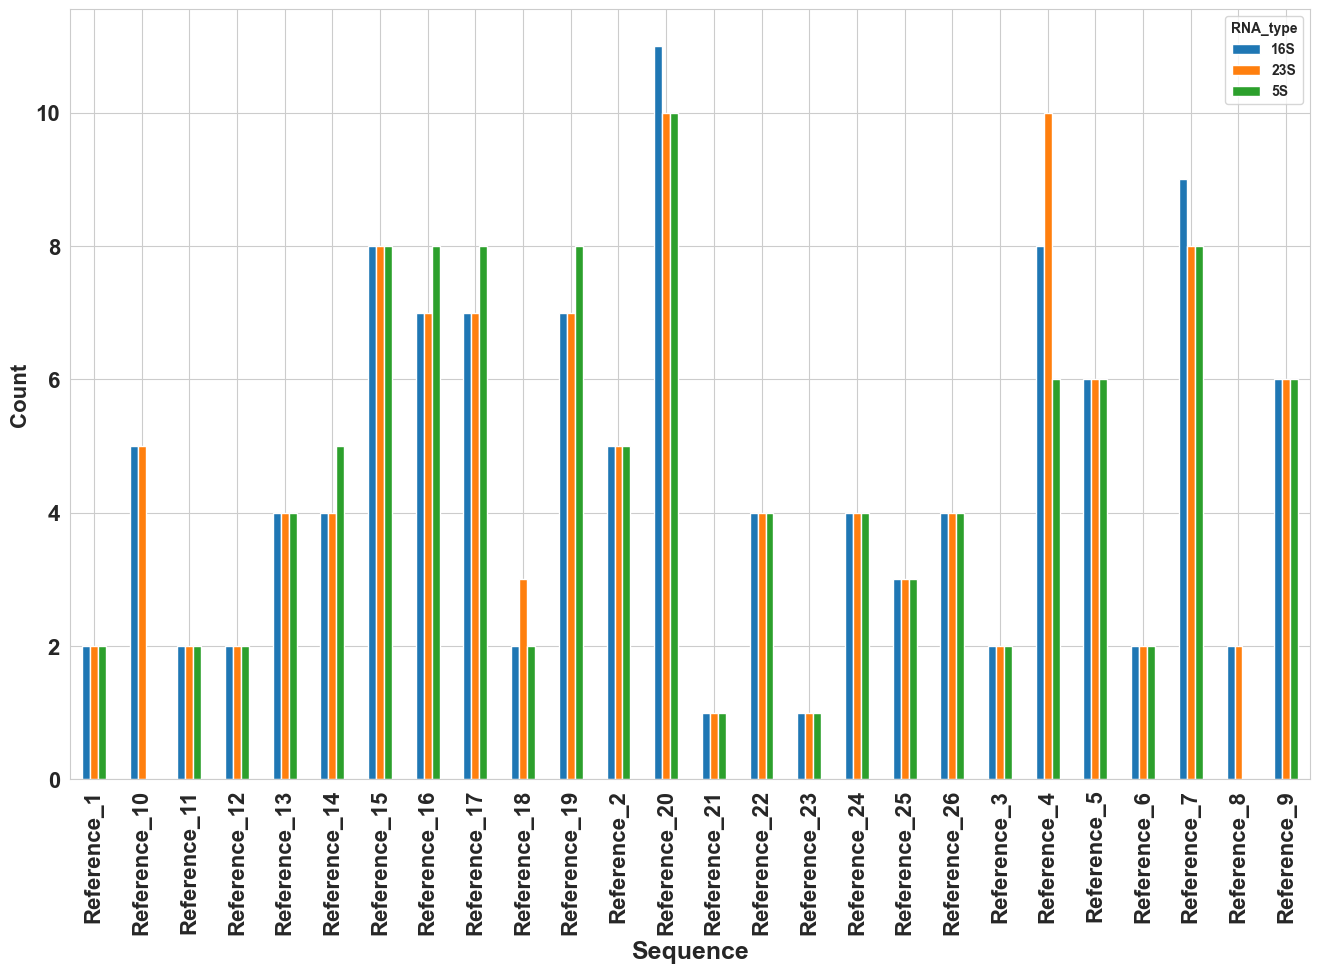

In [82]:
data_for_plotting = pd.pivot(RNA_type_data, values='count', index=['sequence'], columns=['RNA_type'])
data_for_plotting.plot(kind="bar")
plt.xlabel('Sequence', fontsize=18, fontweight='bold')
plt.ylabel('Count', fontsize=16, fontweight='bold')
#sns.barplot(x='sequence', y='count', hue='RNA_type', data=data_for_plotting)

In [2]:
diffexpr_data = pd.read_csv('diffexpr_data.tsv.gz', sep='\t')
diffexpr_data['quality'] = np.where((diffexpr_data['log_pval']>-np.log10(0.05)) & (diffexpr_data['logFC']>=0), "Significantly upregulated",
                                    np.where((diffexpr_data['log_pval']>-np.log10(0.05)) & (diffexpr_data['logFC']<0), "Significantly downregulated",
                                             np.where((diffexpr_data['log_pval']<=-np.log10(0.05)) & (diffexpr_data['logFC']<0), "Non-significantly downregulated",
                                                      np.where((diffexpr_data['log_pval']<=-np.log10(0.05)) & (diffexpr_data['logFC']>=0), "Non-significantly upregulated", np.nan))))
diffexpr_data

,Sample,logFC,pval,pval_corr,log_pval,quality
0,PNLIP,10.092524,6.590327e-01,1.000000e+00,-0.000000,Non-significantly upregulated
1,CELA2A,8.691414,5.823905e-01,1.000000e+00,-0.000000,Non-significantly upregulated
2,CLPS,8.054078,6.517331e-01,1.000000e+00,-0.000000,Non-significantly upregulated
3,MPO,7.817773,4.483336e-01,1.000000e+00,-0.000000,Non-significantly upregulated
4,AMY2A,7.285231,6.324412e-01,1.000000e+00,-0.000000,Non-significantly upregulated
...,...,...,...,...,...,...
20525,SLC12A1,-7.834589,4.993254e-58,1.025115e-53,52.989227,Significantly downregulated
20526,SEMG2,-8.651953,3.989840e-04,1.000000e+00,-0.000000,Non-significantly downregulated
20527,MUC7,-9.196481,3.281804e-07,6.737544e-03,2.171498,Significantly downregulated
20528,SEMG1,-9.313028,3.880575e-04,1.000000e+00,-0.000000,Non-significantly downregulated


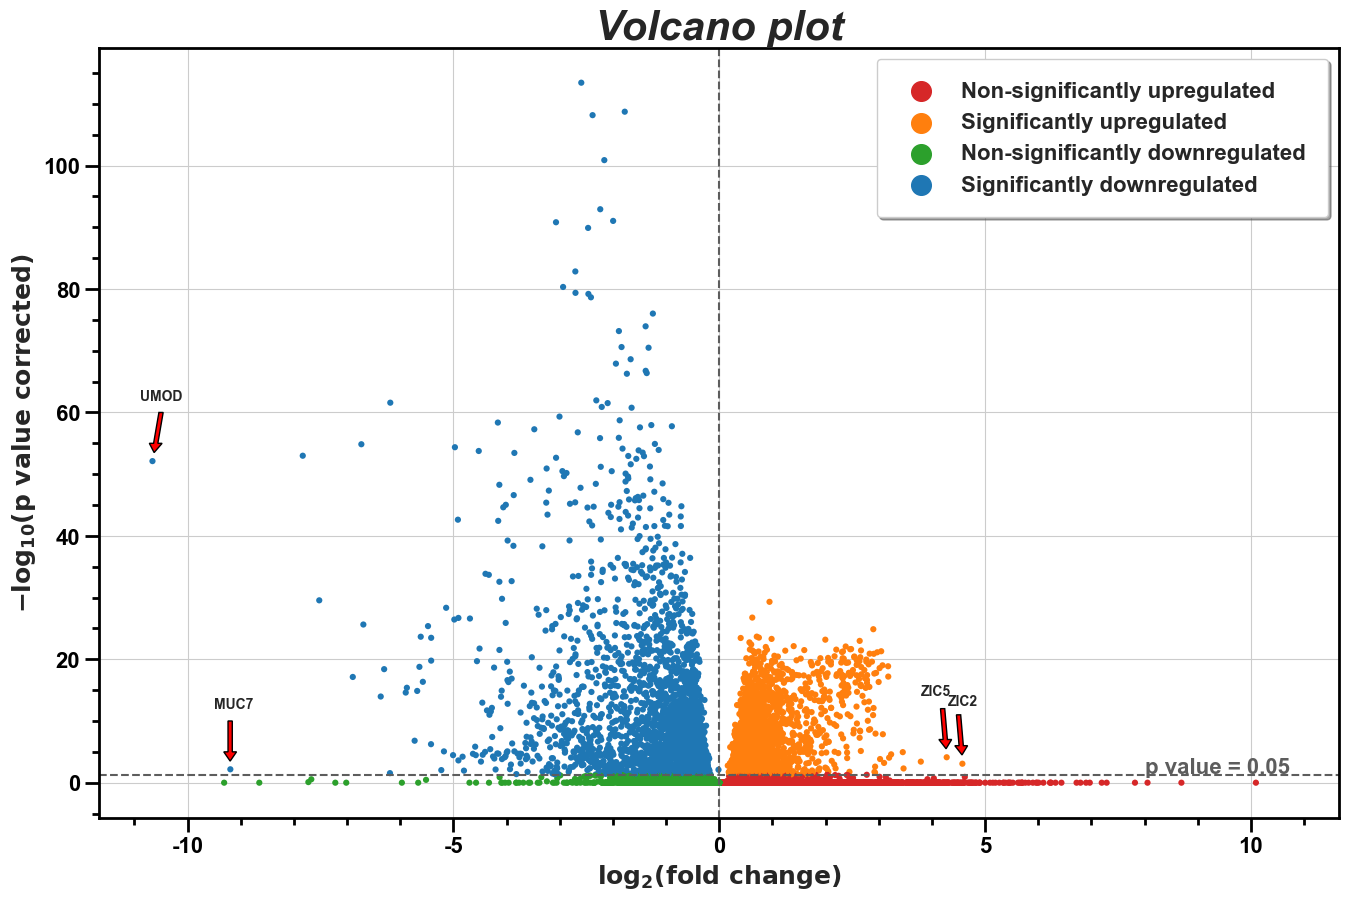

In [70]:
plt.rcParams["figure.figsize"] = (16,10)
plt.rcParams['font.weight'] = 'bold'
fig, ax = plt.subplots()
palette ={"Significantly downregulated": "C0", "Significantly upregulated": "C1", "Non-significantly downregulated": "C2", "Non-significantly upregulated": "C3"}
sns.scatterplot(x="logFC", y="log_pval", hue='quality', data=diffexpr_data, palette=palette, linewidth = 0, s=20)

plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

min_value = float(np.min(diffexpr_data[['logFC']]))
max_value = float(np.max(diffexpr_data[['logFC']]))
boundary = max([np.sqrt(min_value**2), np.sqrt(max_value**2)])+1

ax.set_xlim(-boundary, boundary)
lgnd = ax.legend(fontsize = 16, framealpha=1, shadow=True, borderpad=1)
for handle in lgnd.legendHandles:
    handle.set_sizes([200])

plt.axhline(y=-np.log10(0.05), color='#5d5d5d', linestyle='dashed', label='p value = 0.05')
plt.axvline(0, color='#5d5d5d', linestyle='dashed')
plt.text(8, 2.5, 'p value = 0.05', ha='left', va='center', fontsize=16, color='#5d5d5d')
plt.title('Volcano plot', fontweight='bold', style='italic', fontsize=30)
plt.xlabel(r'$\bf{log_2(fold\ change)}$', fontsize=18)
plt.ylabel(r'$\bf{-log_{10}(p\  value\  corrected)}$', fontsize=18)

ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.yaxis.set_major_locator(MultipleLocator(20))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_minor_locator(MultipleLocator(5))

ax.xaxis.set_tick_params(reset=True, width=2, size=10, colors='black', color='black', top=False)
ax.xaxis.set_tick_params(reset=True, which='minor', width=2, size=5, colors='black', color='black', top=False)
ax.yaxis.set_tick_params(reset=True, width=2, size=10, colors='black', color='black', top=False)
ax.yaxis.set_tick_params(reset=True, which='minor', width=2, size=5, colors='black', color='black', top=False)


plt.rcParams['xtick.minor.width'] = 2
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 2
plt.rcParams['ytick.minor.size'] = 5

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
    ax.spines[axis].set_color('black')

plt.arrow(x=-9.2, y=10, dx=0, dy=-5, width=.08, facecolor='red', edgecolor='black', head_length=1.5)
plt.annotate('MUC7', xy = (-9.5,12))

plt.arrow(x=-10.5, y=60, dx=-0.1, dy=-5, width=.08, facecolor='red', edgecolor='black', head_length=1.5)
plt.annotate('UMOD', xy = (-10.9,62))

plt.arrow(x=4.2, y=12, dx=.05, dy=-5, width=.08, facecolor='red', edgecolor='black', head_length=1.5)
plt.annotate('ZIC5', xy = (3.8,14.2))

plt.arrow(x=4.5, y=11, dx=.05, dy=-5, width=.08, facecolor='red', edgecolor='black', head_length=1.5)
plt.annotate('ZIC2', xy = (4.3,12.5))

plt.savefig("volcano_plot.png", bbox_inches="tight", dpi=300)
plt.show()

